In [ ]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
files.upload()

In [ ]:
v= pd.read_csv("y_dataset.csv")
h= pd.read_csv("x_dataset.csv")
vnum=v.to_numpy()
hnum=h.to_numpy()
vnum=vnum.astype(np.float32)
hnum=hnum.astype(np.float32)
# train_test_split
train,test = train_test_split(vnum,test_size=0.2,random_state=42)

In [ ]:
def plot_image(x,y,n):
  plt.figure(figsize=(20,1))
  plt.scatter(x,y)
  plt.plot(x,y)
  plt.axis('off')
  plt.title(f"{n}")
  plt.show()

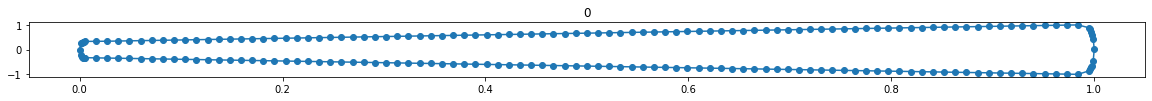

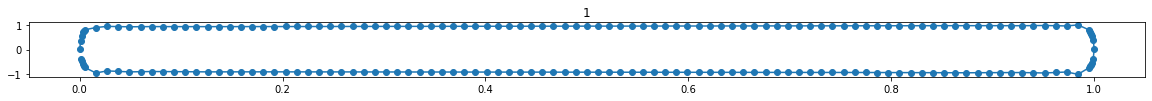

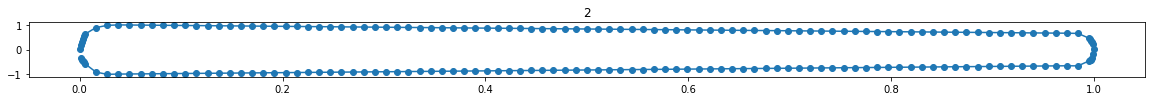

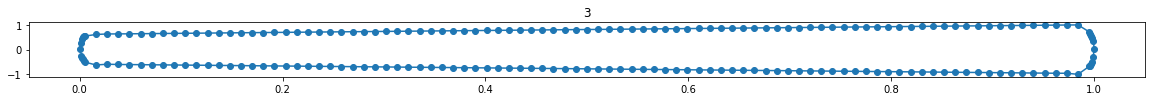

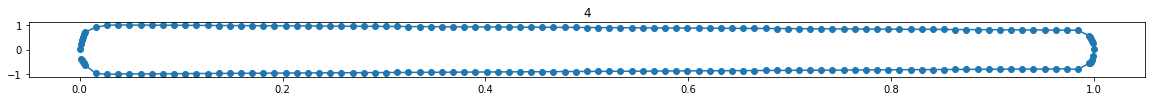

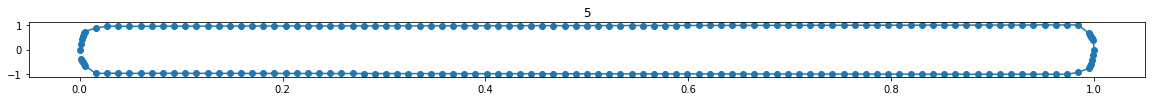

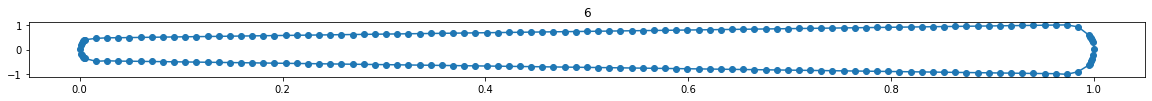

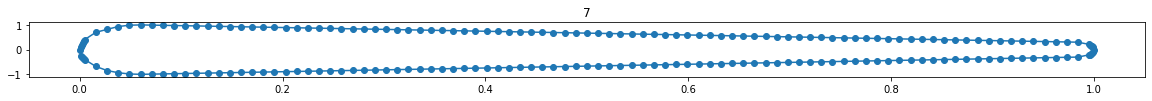

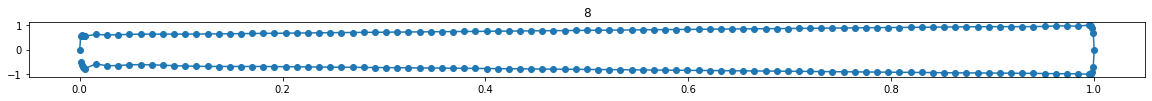

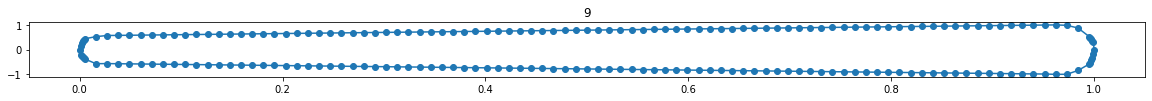

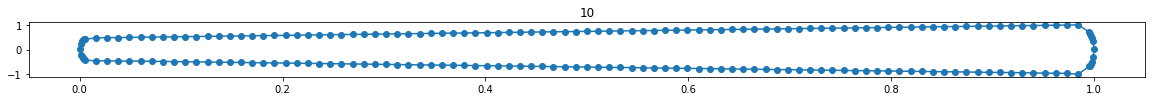

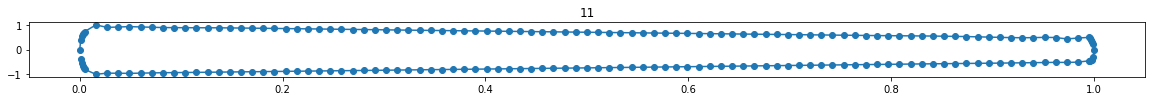

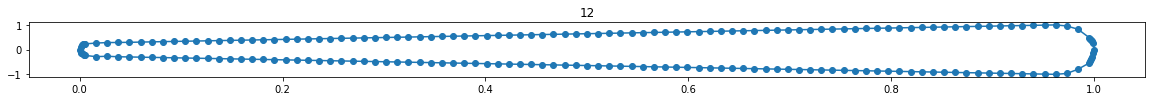

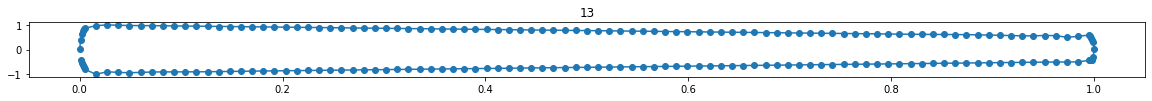

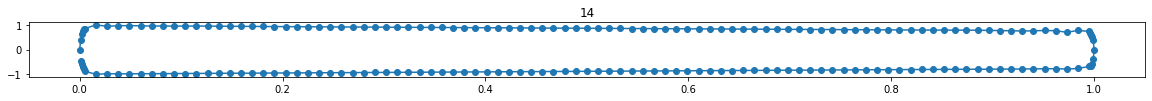

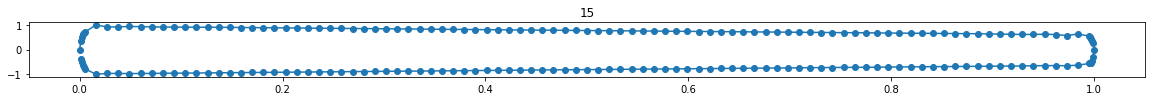

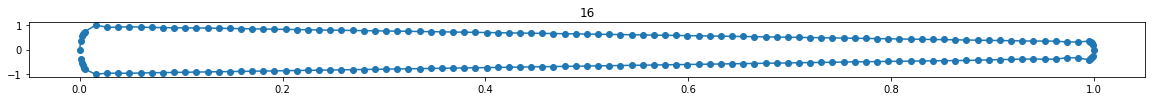

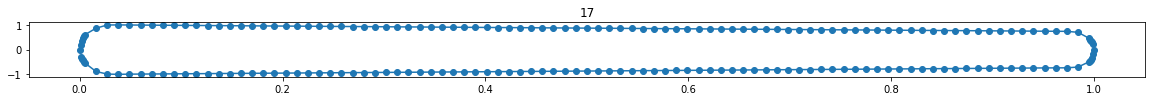

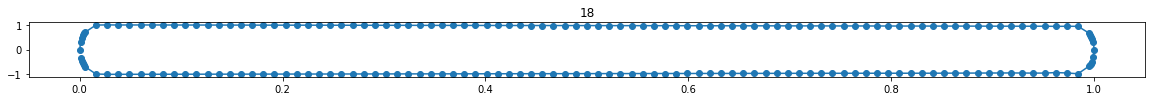

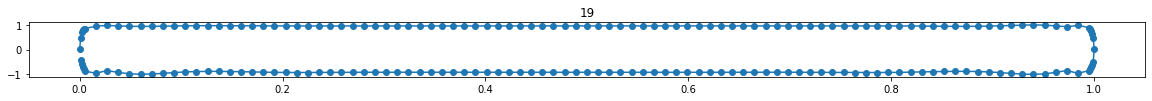

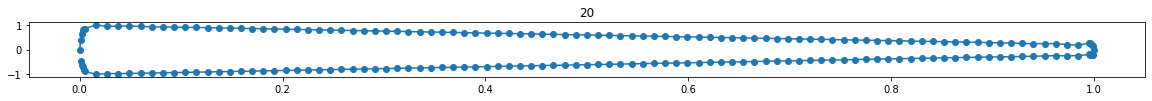

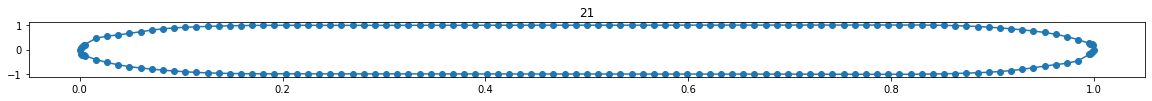

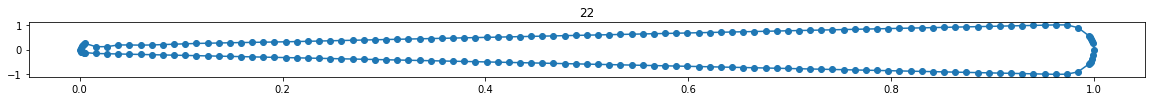

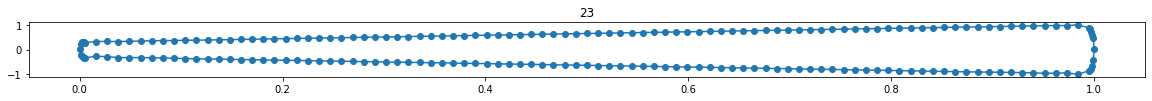

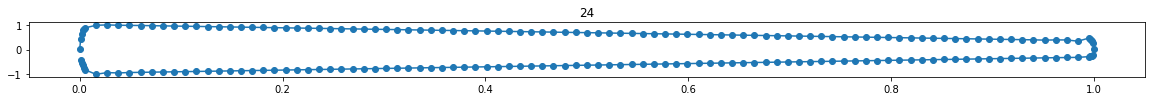

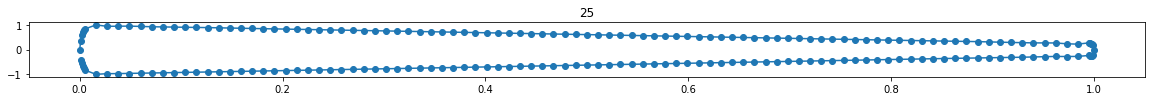

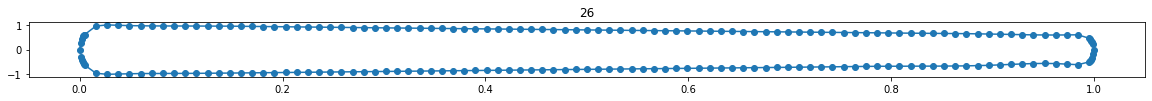

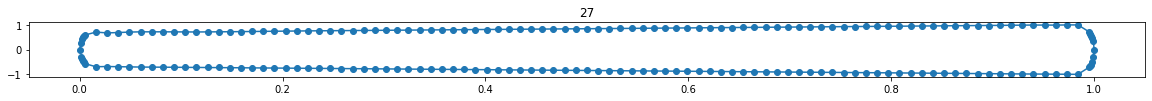

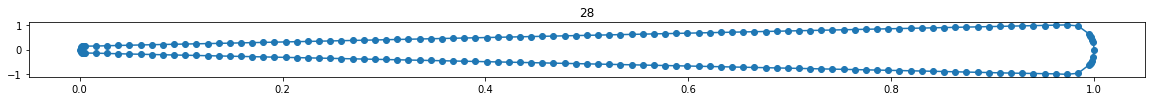

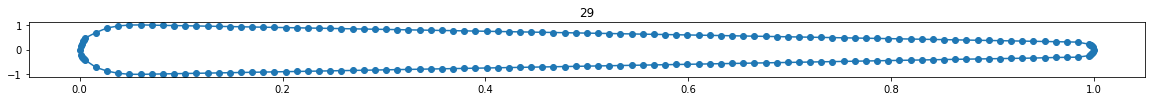

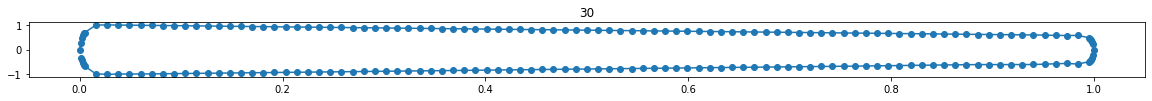

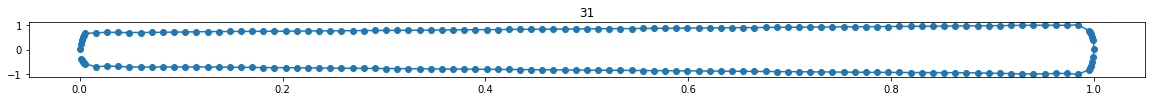

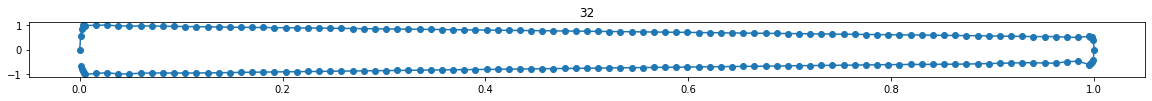

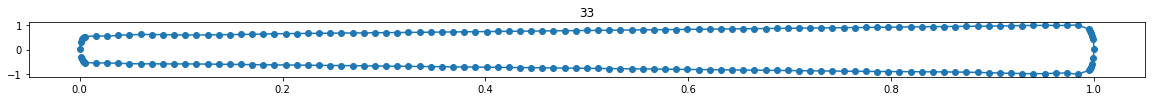

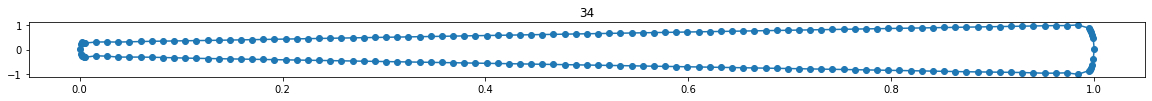

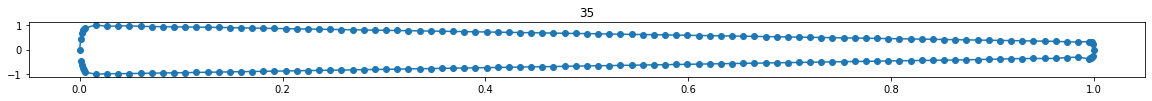

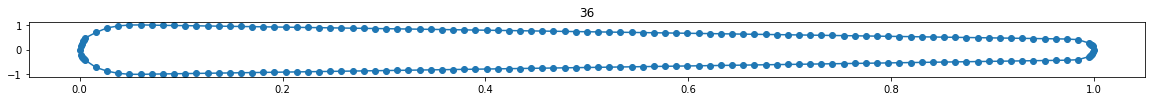

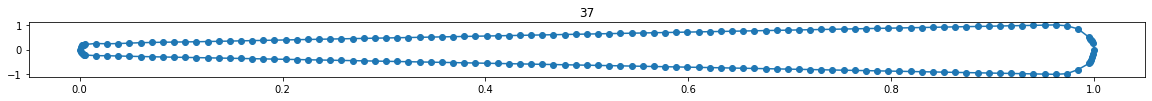

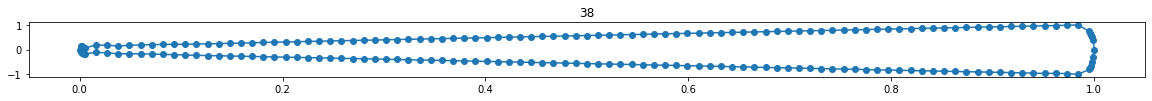

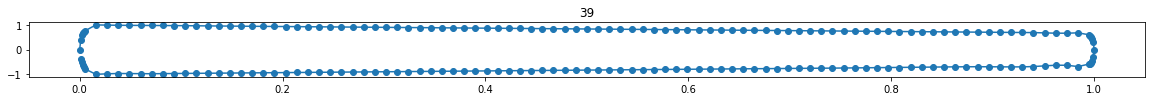

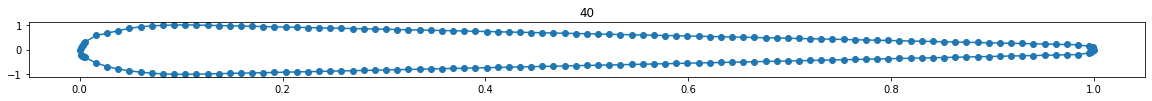

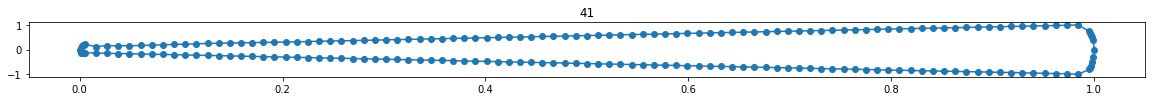

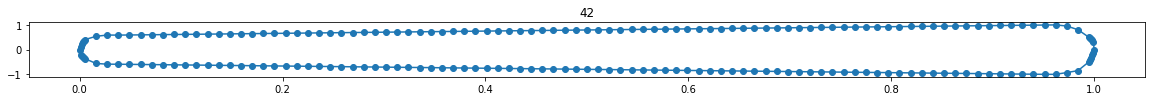

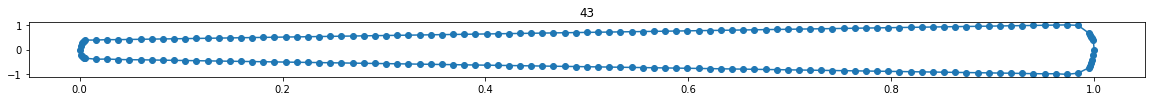

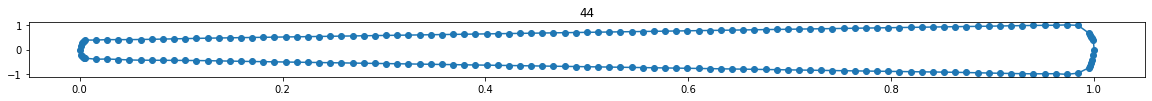

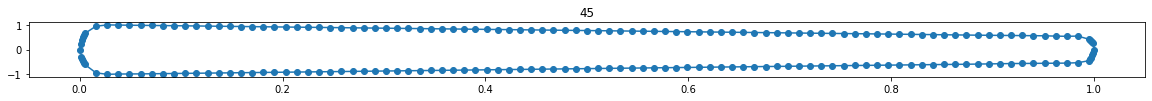

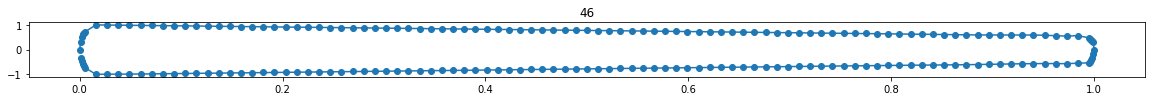

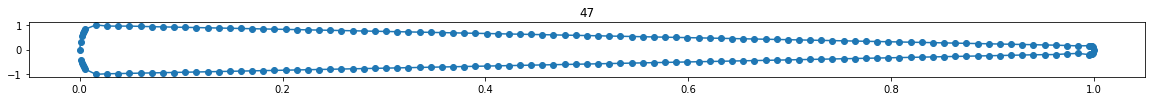

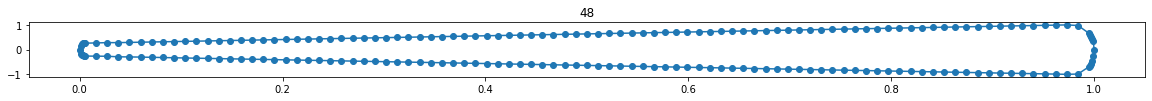

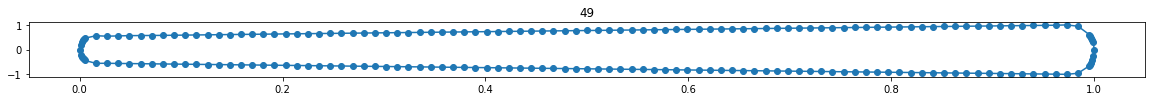

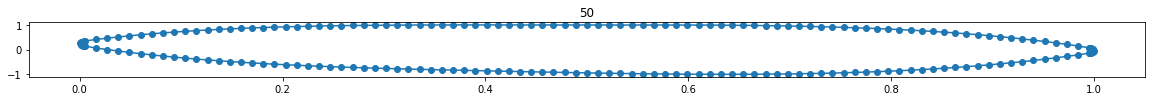

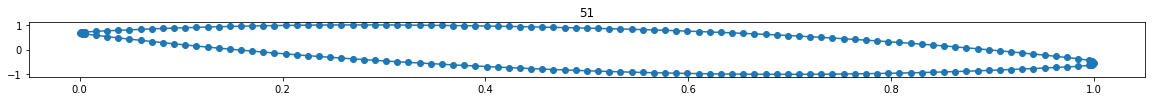

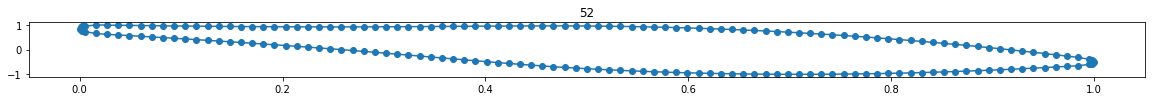

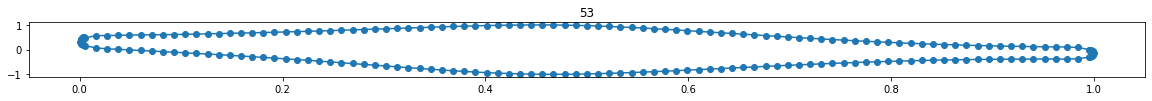

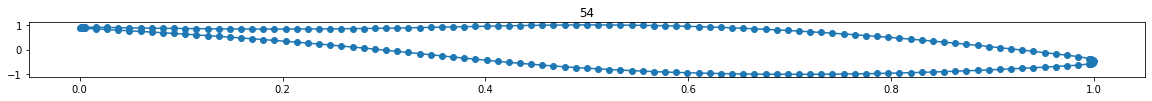

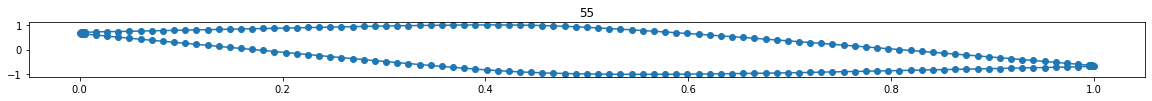

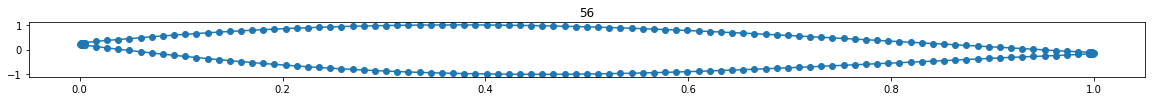

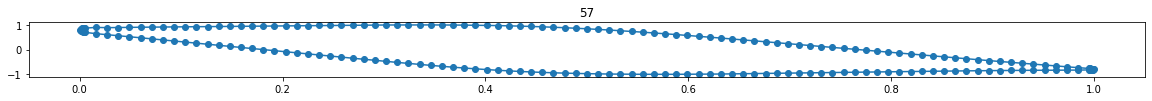

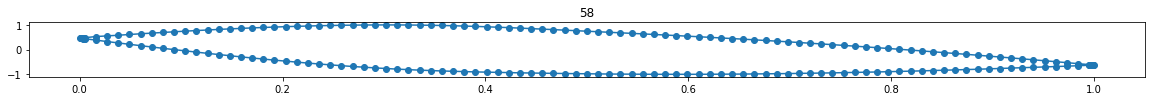

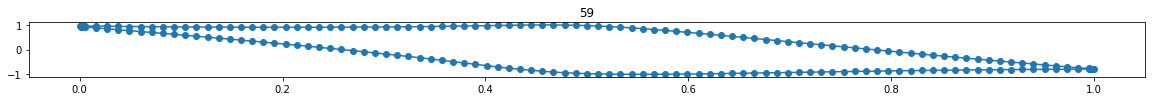

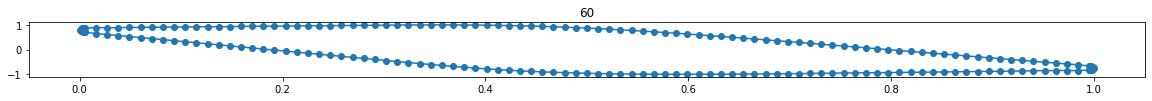

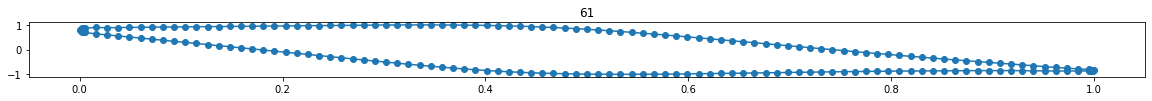

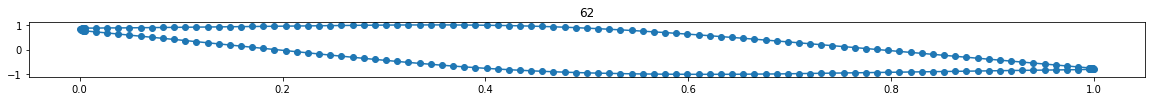

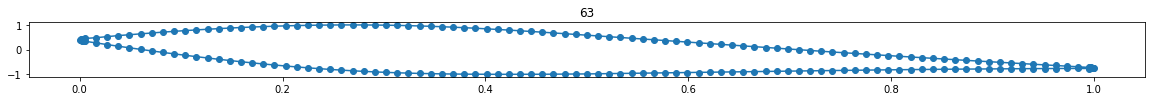

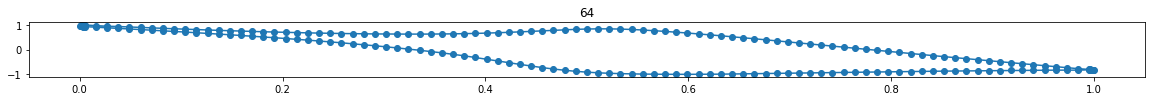

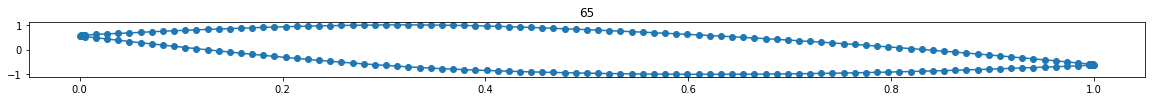

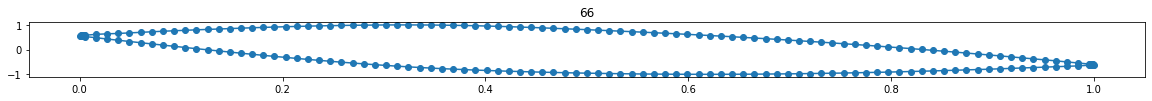

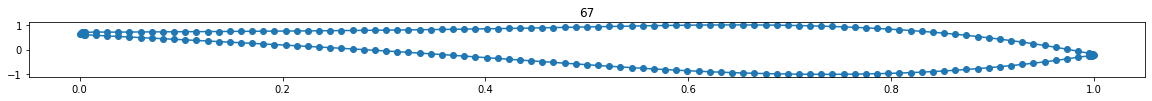

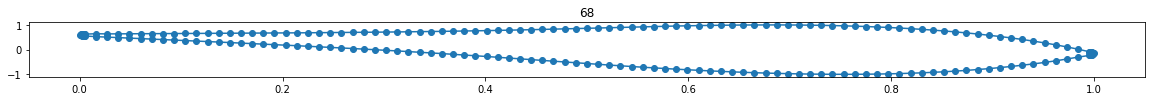

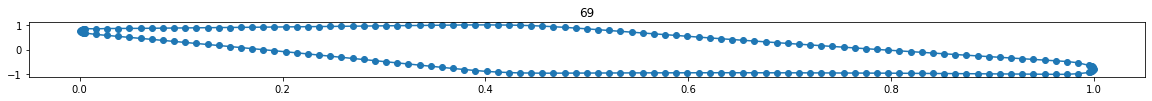

In [ ]:
for n in range(70):
  plot_image(hnum[0],vnum[n],n)

In [ ]:
                                                ######################## GAN ###########################
batch_size=5
buffer_size=100
dataset=tf.data.Dataset.from_tensor_slices(train).shuffle(buffer_size=buffer_size)
dataset=dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

codings_size=10
# Generator (Decoder)
generator=keras.models.Sequential([
    keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.1),input_shape=[codings_size]),
    keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.Dense(200, activation="tanh")
])
# Discriminator
discriminator=keras.models.Sequential([
    keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.1),input_shape=(200,)),
    keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.Dense(1, activation="sigmoid")
])
# GAN
gan=keras.models.Sequential([generator,discriminator])
# Compile
optimizer= keras.optimizers.Adam(learning_rate=0.0005)
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)
discriminator.trainable=False
gan.compile(loss="binary_crossentropy",optimizer=optimizer)

In [ ]:
def train_gan(gan, n_epochs, dataset, batch_size, codings_size):
  generator,discriminator=gan.layers
  for epoch in range(n_epochs):
    print("Epoch {}/{}".format(epoch+1,n_epochs))
    for x_batch in dataset:
      ##### Discriminator trining #####
      noise=tf.random.normal(shape=[batch_size,codings_size])
      fake_sample=generator(noise)
      fake_real=tf.concat([fake_sample,x_batch], axis=0)
      label_d=tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
      discriminator.trainable=True
      discriminator.train_on_batch(fake_real,label_d)
            
      ##### Generator trining #####
      noise=tf.random.normal(shape=[batch_size, codings_size])
      label_g= tf.constant([[1.]]*batch_size)
      discriminator.trainable=False
      gan.train_on_batch(noise,label_g)

In [ ]:
n_epochs=5000
training=train_gan(gan, n_epochs, dataset, batch_size, codings_size)

In [ ]:
for i in range(0,len(test)):
    x_test=test[i].reshape(1,-1)
    y_pre=discriminator(x_test)
    print(y_pre)

dis=  tf.Tensor([[0.5042692]], shape=(1, 1), dtype=float32)
noise=  tf.Tensor(
[[ 0.4225584  -0.3811357   0.11176618 -0.0898129   0.16395022  0.80218804
  -0.27404675  1.6558189  -0.6186612   0.22940032]], shape=(1, 10), dtype=float32)


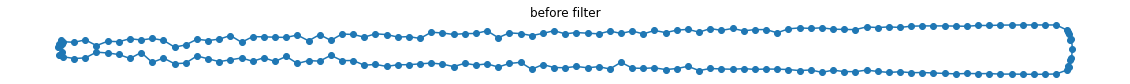

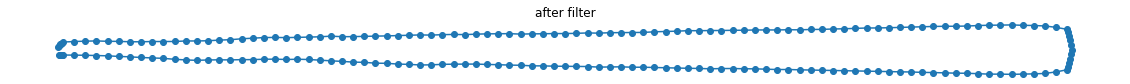

In [ ]:
for n in range(10):
      noise=tf.random.normal(shape=[1,codings_size],seed=n)
      fake_sample=generator(noise)
      dis=discriminator(fake_sample)
      if dis>0.5:
        print("dis= ",dis)
        print("noise= ",noise)
        fake_sample=tf.reshape(fake_sample,[200])
        plot_image(hnum[0],fake_sample,"before filter")
        fake_sample=savgol_filter(fake_sample, window_length= 17, polyorder=2 )
        fake_sample=tf.reshape(fake_sample,[200])
        plot_image(hnum[0],fake_sample,"after filter")